<a href="https://colab.research.google.com/github/jronald88/Time_Series_Project/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**All Imports**

In [52]:
#!unzip '/content/acea-water-prediction.zip'

Archive:  /content/acea-water-prediction.zip
replace Aquifer_Auser.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [166]:
!pip install colorama==0.4.6

In [226]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.1 MB/s eta 0:00:00


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
import missingno as msno
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore
import datetime
from datetime import date
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima


import warnings
warnings.filterwarnings('ignore')



#**Data Inspection**

In [182]:
df = pd.read_csv('/content/Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [183]:
df.shape

(5223, 8)

In [184]:
df.isnull().sum()

,0
Date,0
Rainfall_Bastia_Umbra,1024
Depth_to_Groundwater_P24,55
Depth_to_Groundwater_P25,39
Temperature_Bastia_Umbra,1024
Temperature_Petrignano,1024
Volume_C10_Petrignano,198
Hydrometry_Fiume_Chiascio_Petrignano,1024


#**Cleaning the data and EDA**

In [185]:
df = df[df.Rainfall_Bastia_Umbra.notnull()].reset_index(drop=True) #creates a mask for row elements that are not null.
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)
df.columns = ['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume', 'Hydrometry']
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

print(df.shape)
df.head()

(4199, 6)


,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [186]:
df.set_index('Date', inplace = True)
df.head()

,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
Date,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [187]:
ts = df.Temperature

In [188]:
colours=['red', 'green','blue','orange','magenta']

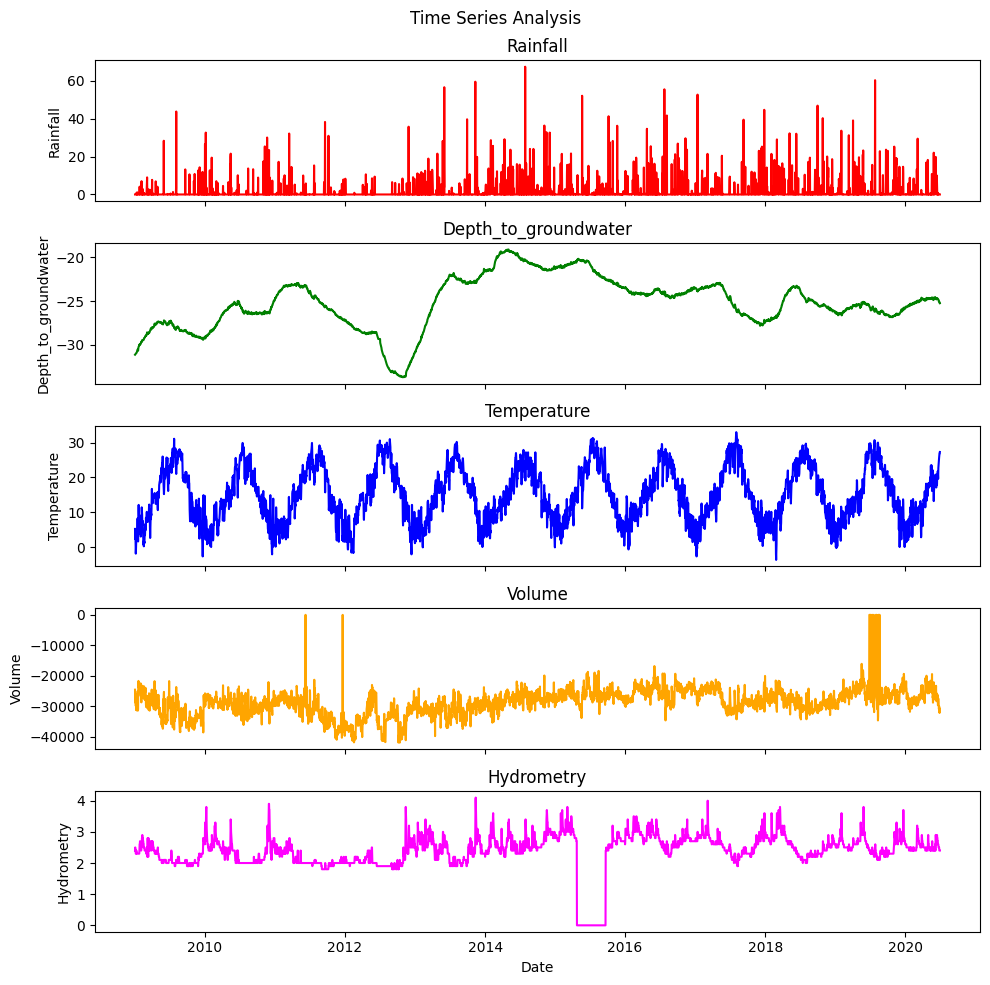

In [189]:

fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (10, 10), sharex = True)
fig.suptitle('Time Series Analysis')

for i, col in enumerate(df.columns):
    sns.lineplot(x = df.index, y = df[col].fillna(method = 'ffill'), ax = ax[i], color = colours[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()



In [190]:
decomposition = seasonal_decompose(ts, period = 52)
decomposition


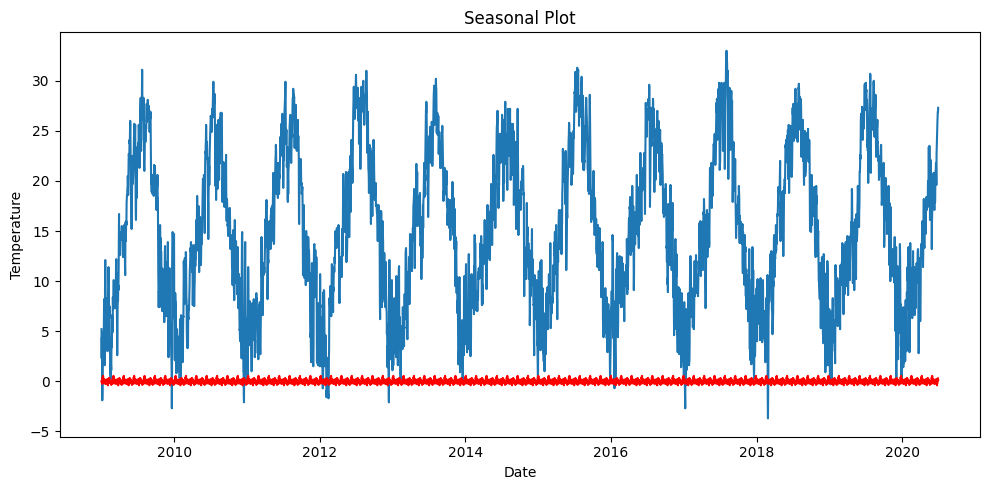

In [191]:
seasonal = decomposition.seasonal
seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal, color = 'red')

plt.title('Seasonal Plot')


plt.tight_layout()

plt.show()


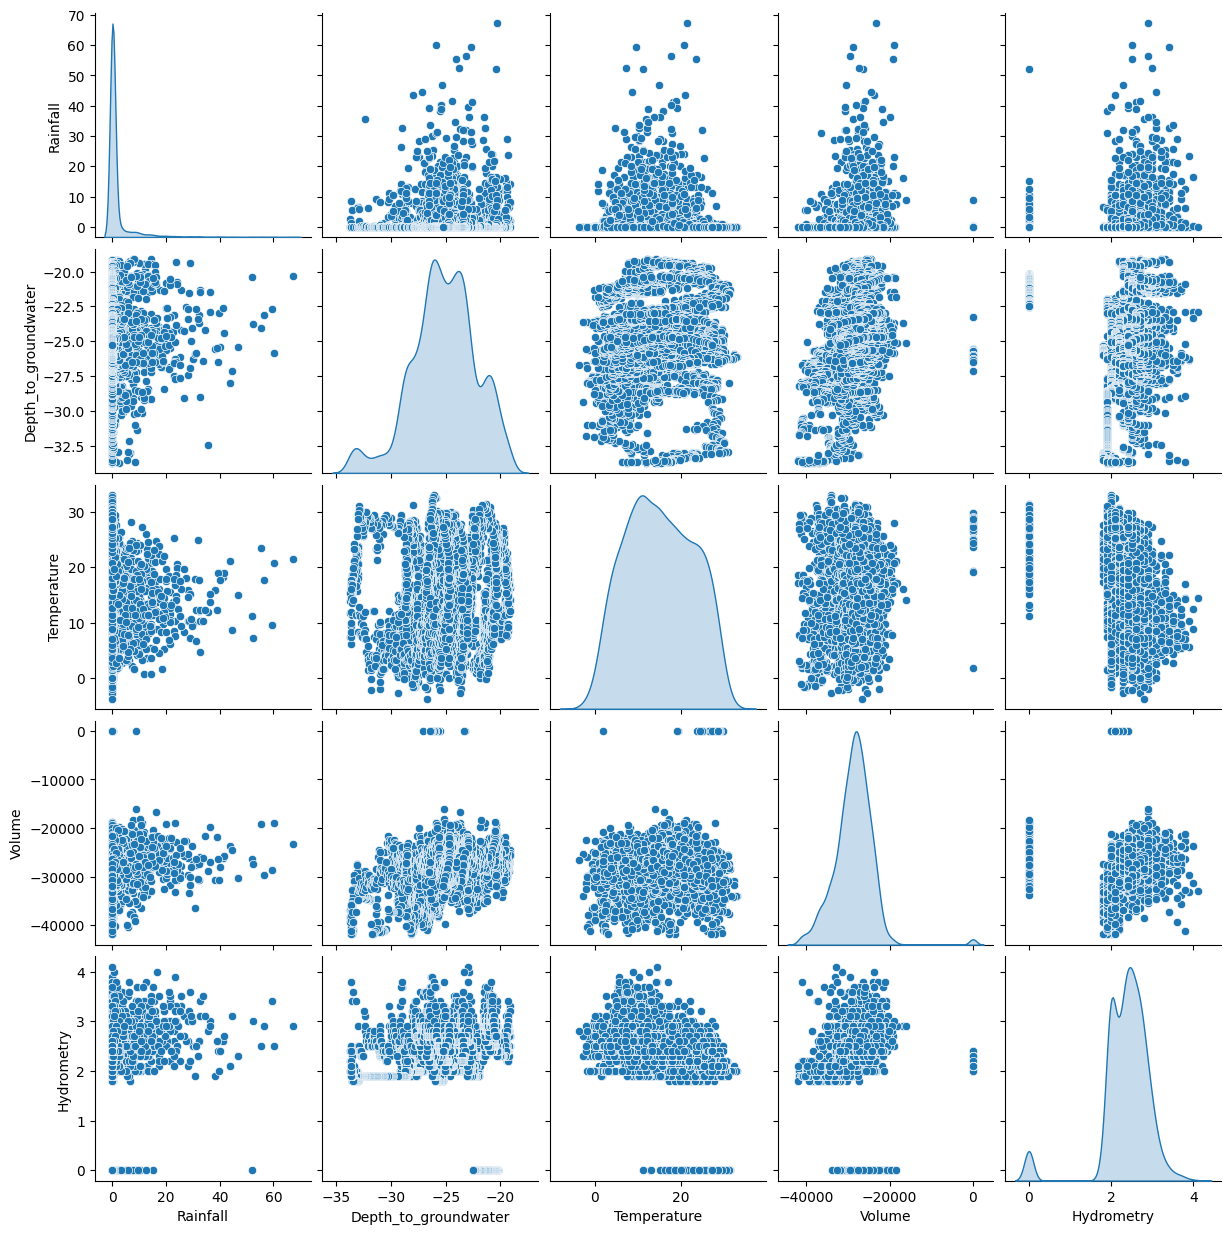

In [192]:
sns.pairplot(df, diag_kind = 'kde')


Data needs to be sorted into chronological order

In [193]:
df = df.sort_index()
df.head()

,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
Date,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


Checking the frequency of the dates - 'D' implies Day

In [194]:
df.index.inferred_freq

'D'

In [195]:
time_span = df.index.max() - df.index.min()
time_span

Timedelta('4198 days 00:00:00')

In [196]:
len(df)

4199

Given the intervals are one less than the number of elements in the df, there are no gaps in the time series

In [197]:
df.isnull().sum()

,0
Rainfall,0
Depth_to_groundwater,27
Temperature,0
Volume,1
Hydrometry,0


In [198]:
df["Depth_to_groundwater"] = df["Depth_to_groundwater"].interpolate()
df["Volume"] = df["Volume"].interpolate()


Use of linear interpolation to fill NaN values. Best option (better than 'ffill' for example.

<Axes: >

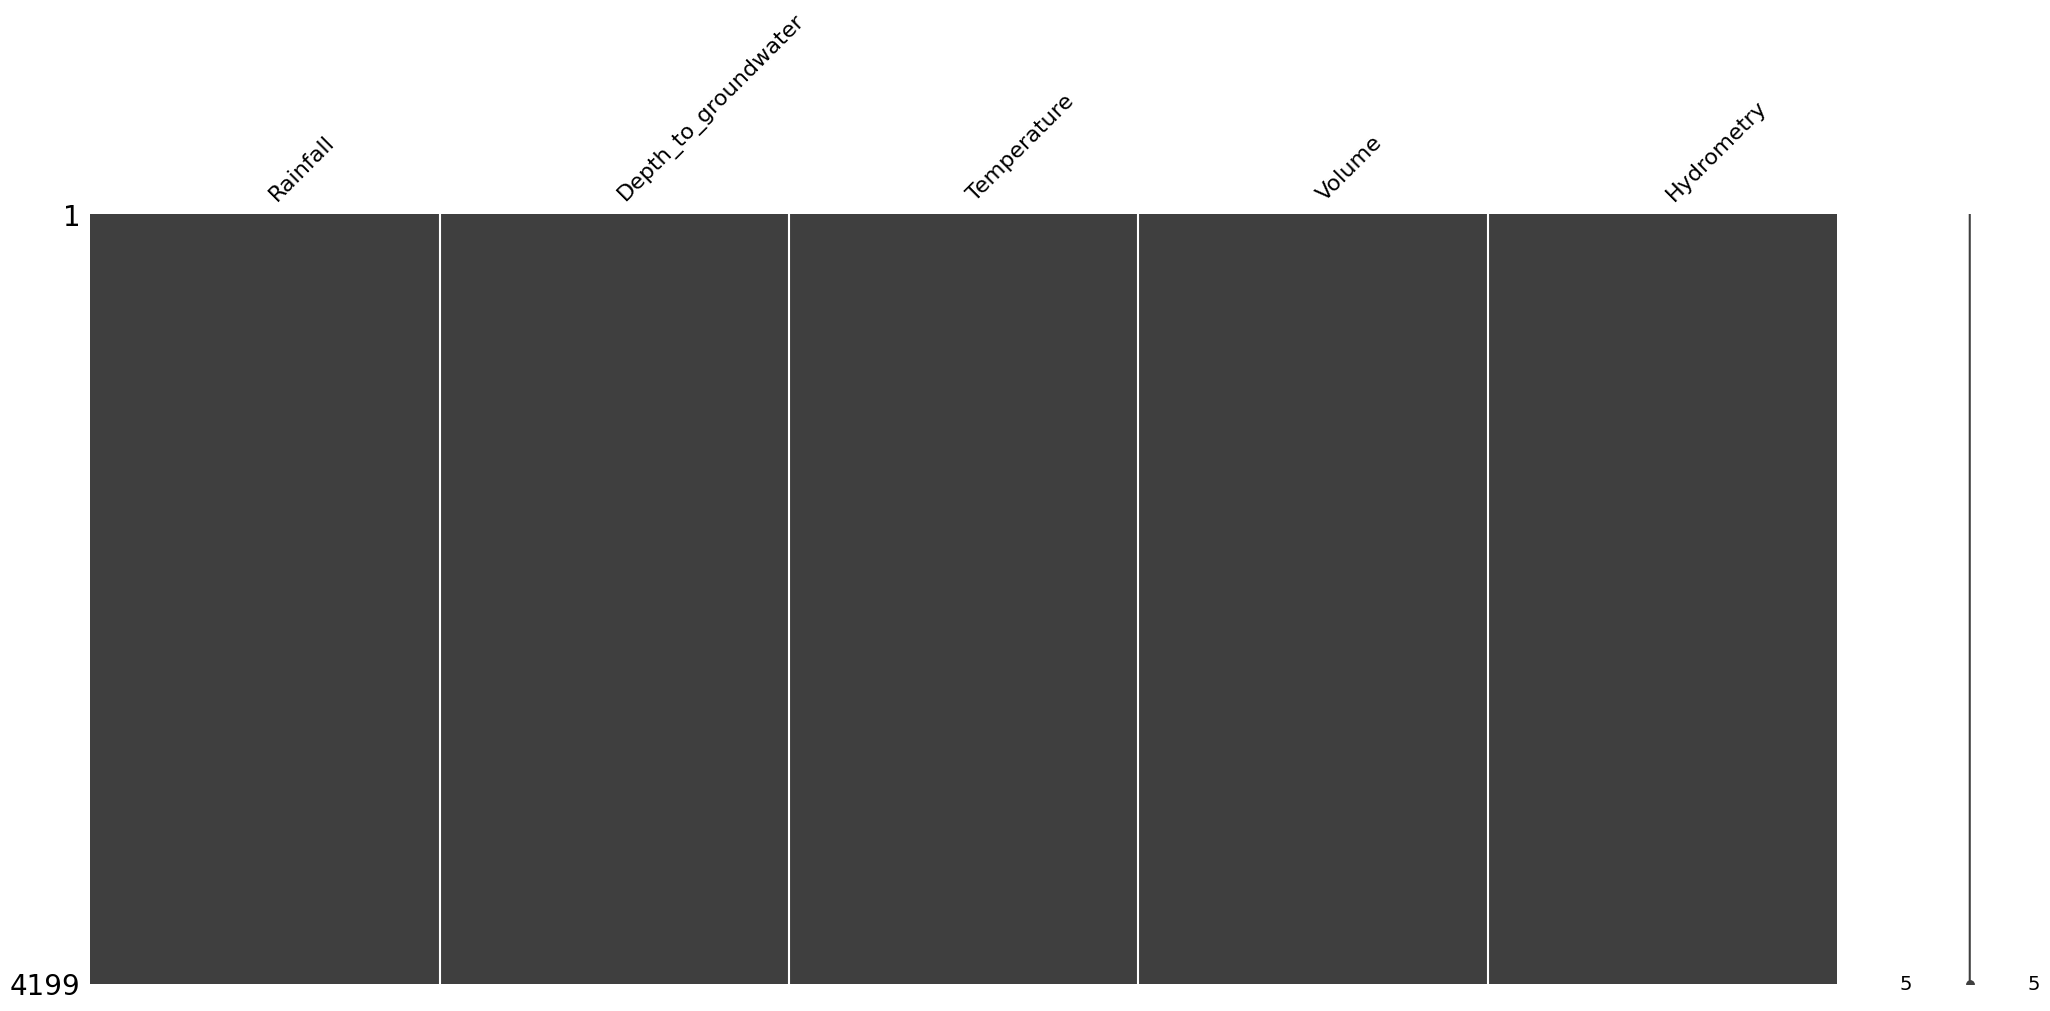

In [199]:
msno.matrix(df)


In [200]:
model = SimpleExpSmoothing(df['Temperature']).fit(smoothing_level=0.01) # Adjust smoothing_level as needed


Smoothing the data for better model fitting. Smoothing level was altered until desirable level found.

In [201]:
dampened_data = model.fittedvalues


<Axes: xlabel='Date'>

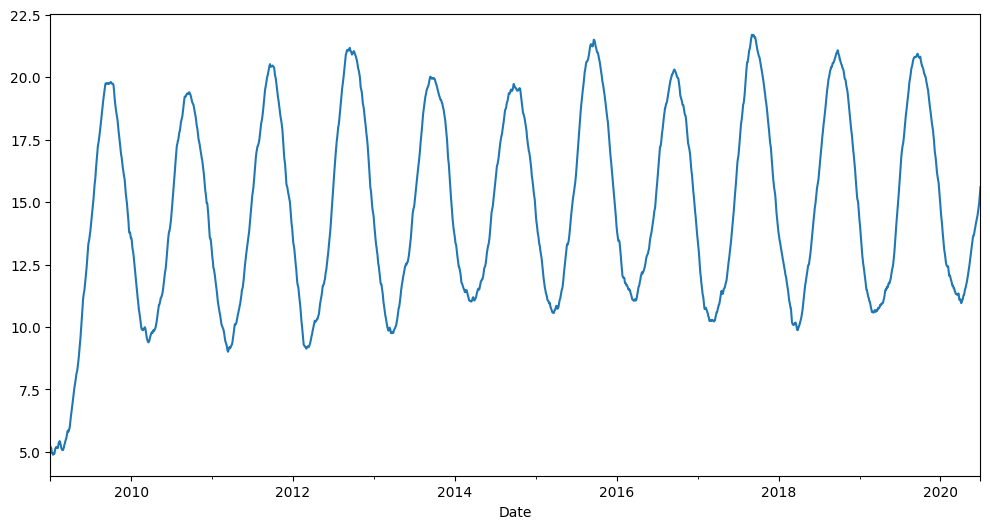

In [202]:
dampened_data.plot(figsize=(12, 6))

In [203]:
model_vol = SimpleExpSmoothing(df['Volume']).fit(smoothing_level=0.01) # Adjust smoothing_level as needed


In [204]:
dampened_vol = model_vol.fittedvalues

<Axes: xlabel='Date'>

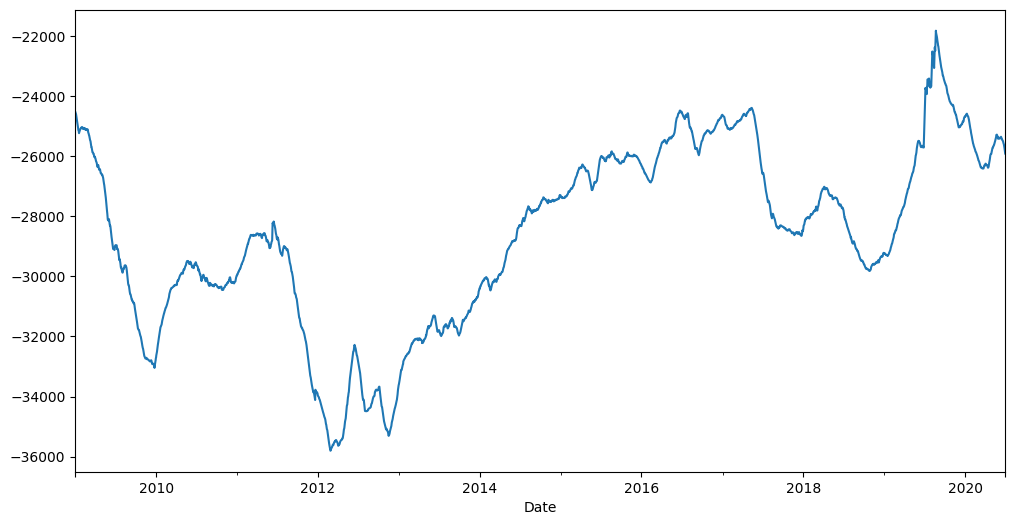

In [205]:
dampened_vol.plot(figsize=(12, 6))

In [206]:
df = df[['Rainfall', 'Depth_to_groundwater',
             'Temperature', 'Volume', 'Hydrometry']].resample('7D').sum()

Test for stationality - if mean and variance dont change during the timeseries.

In [207]:
adfuller(df['Rainfall'].values)


(-3.3739124992536365,
 0.011880998999360572,
 15,
 584,
 {'1%': -3.4415970480373046,
  '5%': -2.866501759246704,
  '10%': -2.5694124827594296},
 4872.646742748393)

p-value < 0.05 (0.011), therefore we can assume stationality.

---



#**EDA 2**

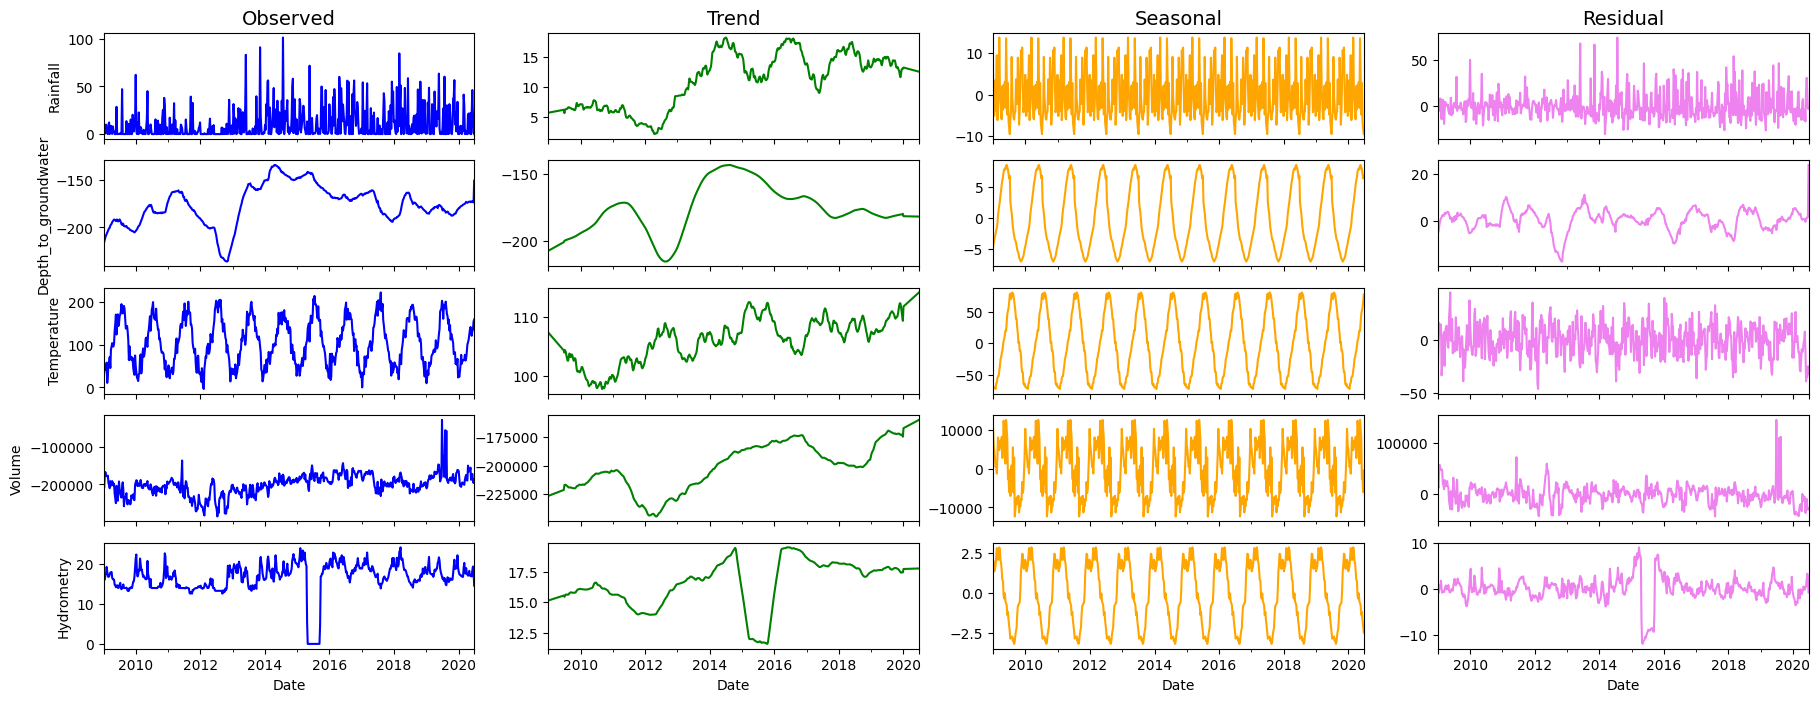

In [208]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, sharex = True, figsize  = (22, 8))

def plot_seasonal_decompose(column, i):
    result = seasonal_decompose(df[column], period = 52, model = 'additive', extrapolate_trend = 'freq')

    ax[0, 0].set_title('Observed', fontsize = 14)
    result.observed.plot(ax = ax[i, 0], legend = False, color = 'blue')
    ax[i, 0].set_ylabel(column, fontsize = 10)

    ax[0, 1].set_title('Trend', fontsize = 14)
    result.trend.plot(ax = ax[i, 1], legend = False, color = 'green')

    ax[0, 2].set_title('Seasonal', fontsize = 14)
    result.seasonal.plot(ax = ax[i, 2], legend = False, color = 'orange')

    ax[0, 3].set_title('Residual', fontsize = 14)
    result.resid.plot(ax = ax[i, 3], legend = False, color = 'violet')


for i, col in enumerate(df.columns):
    plot_seasonal_decompose(col, i)

(17439.0, 18443.0)

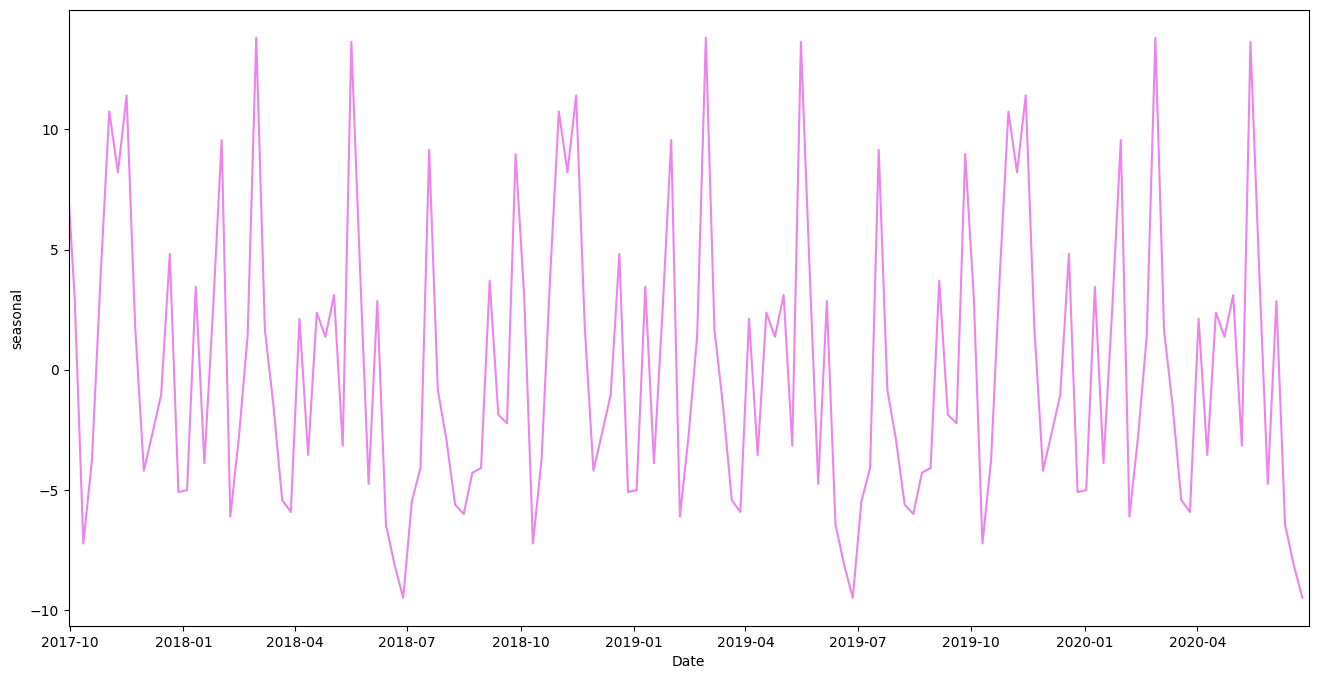

In [209]:
# Individual decomposition of features

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

result = seasonal_decompose(df['Rainfall'], period = 52, model = 'additive', extrapolate_trend = 'freq')

sns.lineplot(x=df.index, y=result.seasonal, color='violet')
ax.set_xlim([date(2017, 9, 30), date(2020, 6, 30)])

Correlation Matrix - looks much nicer with the mask fitted.

Text(0.5, 1.0, 'Correlation Matrix')

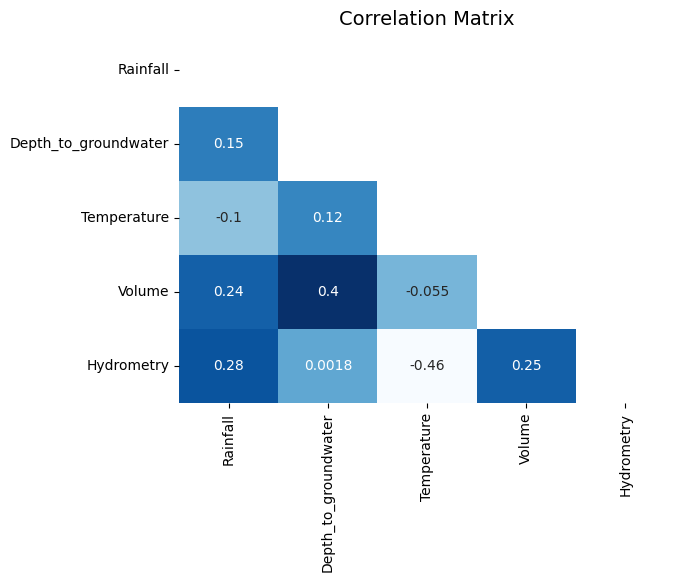

In [210]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap = 'Blues',mask=mask)
plt.title('Correlation Matrix', fontsize = 14)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

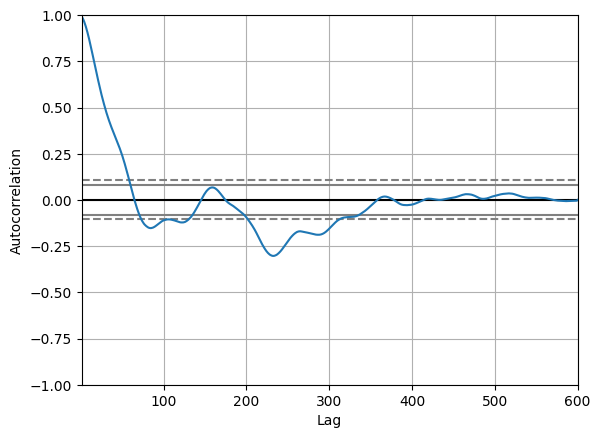

In [211]:
autocorrelation_plot(df['Depth_to_groundwater'])


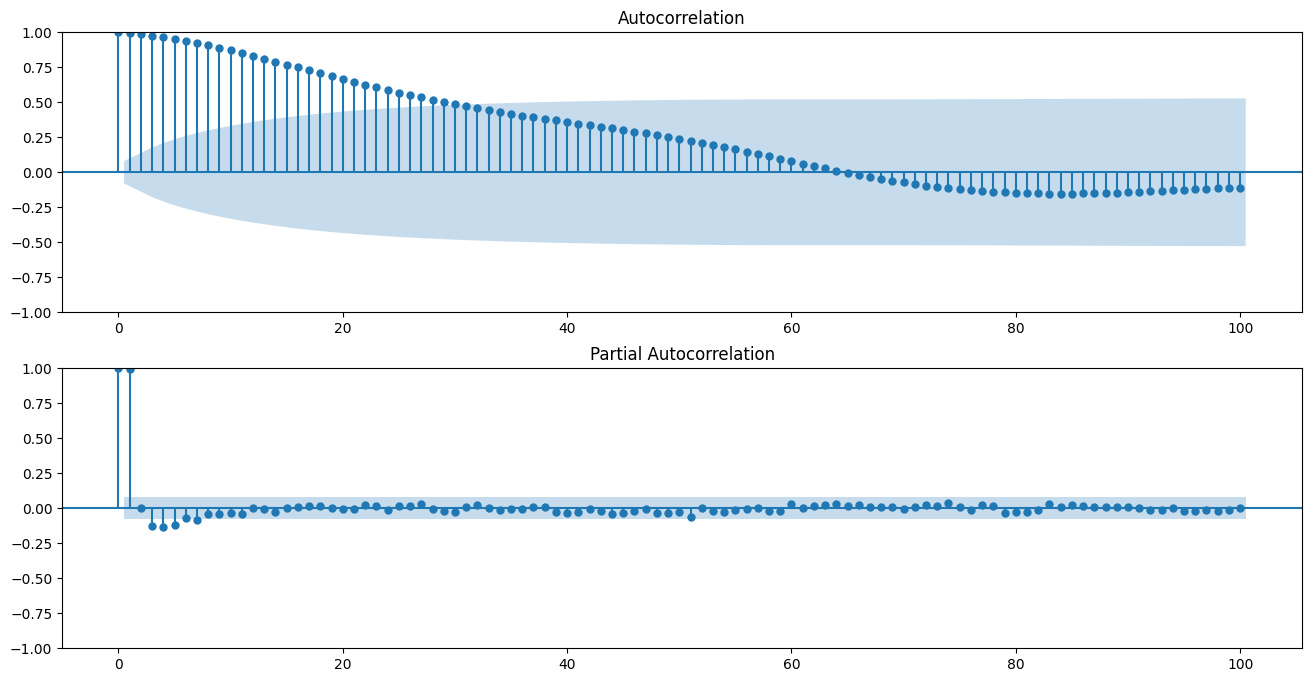

In [212]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16,8))

plot_acf(df['Depth_to_groundwater'], lags = 100, ax = ax[0])
plot_pacf(df['Depth_to_groundwater'], lags = 100, ax = ax[1])

plt.show()


#**Test-Train Split and Creating the Model**

In [220]:
features = ['Rainfall', 'Temperature', 'Volume', 'Hydrometry']
target = ['Depth_to_groundwater']

train_size = int(0.9 * len(df))

multivariate_data = df[target + features].copy()
multivariate_data = multivariate_data.reset_index()
multivariate_data.columns = ['ds', 'y'] + features
# Columns named ds i.e. Date and y i.e. Target
# Forecasting models themselves identify ds, y as date and Target value respectively from data.

train = multivariate_data.iloc[:train_size, :]

# Splitting data into training and validation dataset
X_train = pd.DataFrame(multivariate_data.iloc[:train_size, [0, 2, 3, 4, 5]])
Y_train = pd.DataFrame(multivariate_data.iloc[:train_size, 1])

X_valid = pd.DataFrame(multivariate_data.iloc[train_size: , [0, 2, 3, 4, 5]])
Y_valid = pd.DataFrame(multivariate_data.iloc[train_size: , 1])

train.head()

,ds,y,Rainfall,Temperature,Volume,Hydrometry
0,2009-01-01,-217.34,0.0,11.6,-197154.432,16.6
1,2009-01-08,-215.49,2.0,32.0,-208290.528,16.2
2,2009-01-15,-212.94,0.2,52.7,-178242.336,16.1
3,2009-01-22,-210.13,4.1,43.5,-166980.960,17.5
4,2009-01-29,-208.53,9.9,40.4,-176473.728,17.5


Prophet Model

In [221]:
# Training model
model = Prophet()
for col in features:
    model.add_regressor(col)

# Fit model
model.fit(train)

# Predict on validation set
y_pred = model.predict(X_valid)

# Calculate error
mae = mean_absolute_error(Y_valid, y_pred['yhat'])
rmse = np.sqrt(mean_squared_error(Y_valid, y_pred['yhat']))

print(Fore.GREEN + f'MAE: {mae}')
print(Fore.BLUE + f'RMSE: {rmse}')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7owmu4g/zx_e95en.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7owmu4g/buf08uyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97837', 'data', 'file=/tmp/tmpz7owmu4g/zx_e95en.json', 'init=/tmp/tmpz7owmu4g/buf08uyw.json', 'output', 'file=/tmp/tmpz7owmu4g/prophet_modelhq82lmyp/prophet_model-20240918193320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 5.8676664770465266
RMSE: 7.2203369340684365


#**Prophet Model Prediction**

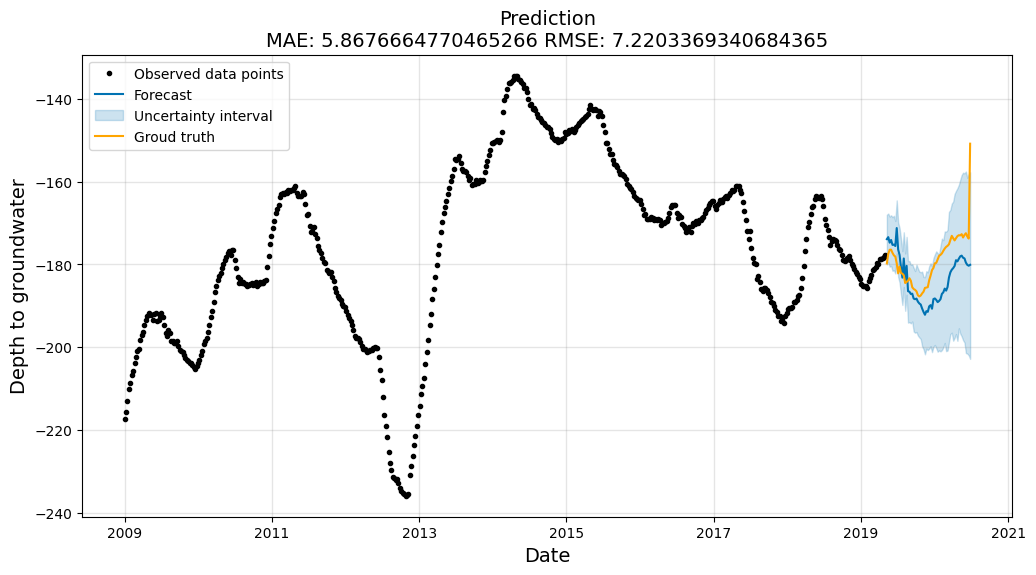

In [222]:
fig, ax = plt.subplots(1, figsize = (12, 6))

model.plot(y_pred, ax = ax)
sns.lineplot(x = X_valid['ds'], y = Y_valid['y'], ax = ax, color = 'orange', label = 'Groud truth')

ax.set_title(f'Prediction\nMAE: {mae} RMSE: {rmse}', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Depth to groundwater', fontsize = 14)

plt.show()

High RMSE in this model. Not the best fit?

#**Auto ARIMA Model**

In [230]:
model_aa = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=17510.294, Time=31.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=17851.501, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=17854.772, Time=1.87 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=17854.650, Time=2.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=17849.530, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=17508.573, Time=22.40 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=17506.752, Time=6.15 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=17508.564, Time=18.68 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=17508.562, Time=6.59 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=17504.910, Time=1.86 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=17506.702, Time=5.38 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=17506.712, Time=8.26 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=19.34 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=17617.138, Time=1.55 sec
 ARIMA(

In [231]:
model_aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4198
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -8747.541
Date:                Wed, 18 Sep 2024   AIC                          17503.083
Time:                        19:48:07   BIC                          17528.452
Sample:                    01-02-2009   HQIC                         17512.054
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7771      0.020     38.158      0.000       0.737       0.817
ar.L2         -0.1761      0.014    -12.215      0.000      -0.204      -0.148
ma.L1         -0.8350      0.018    -47.661      0.000      -0.869      -0.801
sigma2         3.7792      0.064     59.515      0.000       3.655       3.904
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               520.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#**ARIMA Model Prediction**

In [232]:
forecast = model_aa.predict(10)
forecast

,0
2020-07-01,-0.703066
2020-07-02,-0.616787
2020-07-03,-0.355454
2020-07-04,-0.167576
2020-07-05,-0.067611
2020-07-06,-0.023023
2020-07-07,-0.005982
2020-07-08,-0.000593
2020-07-09,0.000593
2020-07-10,0.000565


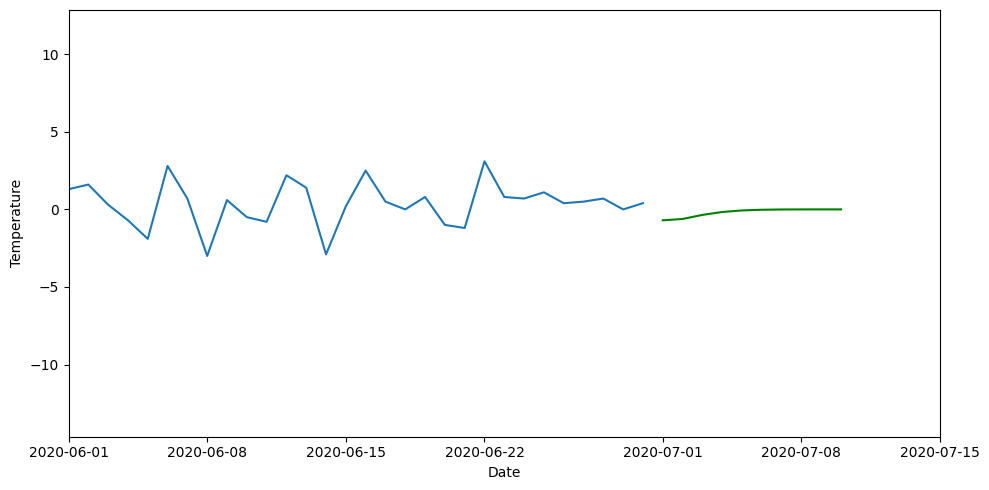

In [237]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")
plt.xlim(pd.to_datetime('2020-06-01'), pd.to_datetime('2020-07-15'))

plt.tight_layout()

plt.show()